# Term Project - Final Exmination - Part B
* BMIS - 342: Section: 02
* Group Members: Reese Averill, Nate Yoon, Matthew Kucsak, Terrell Elgee, Cole Schmidlin
* Due date: 5/5/21 @ 12pm
* Purpose: To take what we've learned all semester in Data Analytics and apply it to the Excel "plants" workbook. We want to cover topics of preprocessing data, exploring the dataset, clustering, and classification analysis.

<b>Scenario:</b> 

There is a dataset of iris. While we know what specie each case is, we are interested in
know whether we can use dimensions of petal and sepal to differentiate them by using clustering
technique. Meanwhile, we are also interested in building a predictive model to predict what specie
a new case is. We will build the predictive model using decision tree and neural networks.

<b>Questions:</b>

* Can we use features to cluster different species?
* Answer: Yes
* If yes, then how many categories (clusters) of iris can we come up with? What variables contribute to the clustering most?
* Answer: 
* Once we have clusters, each of which is a specie. Can we build a predictive model to predict species? (Note: The dataset has specie information of each case. After you cluster the cases, you would have another set of specie information. When you create predictive models, you should use the original specie information.)   
* Which technique, Decision Tree or Neural Nets, predicts better?

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import tree

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


In [2]:
# Loading the dataset
plants = pd.read_excel('http://barney.gonzaga.edu/~chuang/data/plants.xlsx')
plants.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,4.3,2.8,1.9,NaN,0
1,2,4.8,3.4,1.6,0.2,0
2,3,5.0,3.0,1.8,0.4,0
3,4,4.8,3.0,1.4,0.3,0
4,5,5.1,3.8,1.6,0.2,0


## Preprocessing The Data

### Identifying and deal with missing data

In [3]:
# Identifying missing values
plants.isnull()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,True,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
321,False,False,False,False,False,False
322,False,False,False,False,False,False
323,False,False,False,False,True,False
324,False,False,False,False,False,False


In [4]:
# Finding number of missing values of each column: Summarizing missing data
plants.isnull().sum()

ID               0
sepal_length     1
sepal_width      5
petal_length    10
petal_width      8
species          0
dtype: int64

In [5]:
# Identifying records that have missing values
plants.isnull().any(axis=1)

0       True
1      False
2      False
3      False
4      False
       ...  
321    False
322    False
323     True
324    False
325    False
Length: 326, dtype: bool

In [6]:
# Identifying and displaying records that have missing values
plants[plants.isnull().any(axis=1)]

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,4.3,2.8,1.9,NaN,0
32,33,5.4,2.9,1.7,NaN,0
35,36,5.7,3.6,NaN,0.2,0
38,39,5.3,NaN,1.4,0.2,0
39,40,4.7,NaN,NaN,NaN,0
46,47,4.6,3.0,NaN,0.5,0
62,63,NaN,3.1,1.8,0.3,0
67,68,5.2,3.8,NaN,0.4,0
102,103,5.2,2.7,NaN,0.5,0
115,116,5.5,2.4,3.7,NaN,1


In [7]:
# Dropping all missing values of Nan

plants.dropna(subset = ['sepal_length'], inplace=True)
plants.dropna(subset = ['sepal_width'], inplace=True)
plants.dropna(subset = ['petal_length'], inplace=True)
plants.dropna(subset = ['petal_width'], inplace=True)

In [8]:
plants

,ID,sepal_length,sepal_width,petal_length,petal_width,species
1,2,4.8,3.4,1.6,0.2,0
2,3,5.0,3.0,1.8,0.4,0
3,4,4.8,3.0,1.4,0.3,0
4,5,5.1,3.8,1.6,0.2,0
5,6,5.0,3.2,1.2,0.2,0
...,...,...,...,...,...,...
320,321,6.2,3.4,5.4,2.3,2
321,322,6.8,2.6,6.8,2.4,2
322,323,6.0,2.2,5.0,1.5,2
324,325,6.4,3.1,5.5,1.8,2


### Identify and deal with outliers, which are those greater than or less than three standard deviations

In [9]:
# -- We are creating new columns for sepal and petal to calculate Z-Scores --

# -- Standardizing price --
from scipy import stats
plants['sepal_length_z'] = stats.zscore(plants['sepal_length'])
plants['sepal_width_z'] = stats.zscore(plants['sepal_width'])
plants['petal_length_z'] = stats.zscore(plants['petal_length'])
plants['petal_width_z'] = stats.zscore(plants['petal_width'])

In [10]:
# -- We want to consider any data values that have z-score 
# -- greater than 3 standard deviation as outliers. --

plants[(plants['sepal_length_z']>3) | (plants['sepal_length_z']<-3)]
# plants[(plants['sepal_width_z']>3) | (plants['sepal_width_z']<-3)]
# plants[(plants['petal_length_z']>3) | (plants['petal_length_z']<-3)]
# plants[(plants['petal_width_z']>3) | (plants['petal_width_z']<-3)]

,ID,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z
116,117,8.900000,2.6,3.3,1.3,1,3.421957,-0.814827,-0.266091,0.070337
154,155,8.975003,2.9,4.9,1.5,1,3.505314,-0.252114,0.624529,0.332794
261,262,9.157097,3.3,5.2,2.4,2,3.707692,0.498170,0.791520,1.513851
282,283,8.975003,3.8,6.7,2.2,2,3.505314,1.436026,1.626476,1.251394


#### Visualizing in Box Plots

In [11]:
# -- Box plot for sepal length --

plt.boxplot(plants['sepal_length'], vert = True)
plt.ylabel('Sepal Length')
plt.title('Sepal Length Box Plot')

Text(0.5, 1.0, 'Sepal Length Box Plot')

In [12]:
# -- Box plot for sepal width --

plt.boxplot(plants['sepal_width'], vert = True)
plt.ylabel('Sepal Width')
plt.title('Sepal Width Box Plot')

Text(0.5, 1.0, 'Sepal Width Box Plot')

In [13]:
# -- Box plot for petal length --

plt.boxplot(plants['petal_length'], vert = True)
plt.ylabel('Petal Length')
plt.title('Petal Length Box Plot')

Text(0.5, 1.0, 'Petal Length Box Plot')

In [14]:
# -- Box plot for petal width --

plt.boxplot(plants['petal_width'], vert = True)
plt.ylabel('Petal Width')
plt.title('Petal Width Box Plot')

Text(0.5, 1.0, 'Petal Width Box Plot')

### Identify and deal with duplicate data

In [15]:
# -- Standard method --
plants.drop_duplicates()

,ID,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z
1,2,4.8,3.4,1.6,0.2,0,-1.134735,0.685741,-1.212374,-1.373178
2,3,5.0,3.0,1.8,0.4,0,-0.912457,-0.064543,-1.101047,-1.110721
3,4,4.8,3.0,1.4,0.3,0,-1.134735,-0.064543,-1.323702,-1.241950
4,5,5.1,3.8,1.6,0.2,0,-0.801319,1.436026,-1.212374,-1.373178
5,6,5.0,3.2,1.2,0.2,0,-0.912457,0.310599,-1.435029,-1.373178
...,...,...,...,...,...,...,...,...,...,...
320,321,6.2,3.4,5.4,2.3,2,0.421208,0.685741,0.902847,1.382623
321,322,6.8,2.6,6.8,2.4,2,1.088041,-0.814827,1.682140,1.513851
322,323,6.0,2.2,5.0,1.5,2,0.198931,-1.565111,0.680193,0.332794
324,325,6.4,3.1,5.5,1.8,2,0.643486,0.123028,0.958511,0.726480


In [16]:
# -- the index column is in fact one primary key column, which prevents duplicate records from happening --
# -- it must be removed --
plants.drop('ID', axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z
1,4.8,3.4,1.6,0.2,0,-1.134735,0.685741,-1.212374,-1.373178
2,5.0,3.0,1.8,0.4,0,-0.912457,-0.064543,-1.101047,-1.110721
3,4.8,3.0,1.4,0.3,0,-1.134735,-0.064543,-1.323702,-1.241950
4,5.1,3.8,1.6,0.2,0,-0.801319,1.436026,-1.212374,-1.373178
5,5.0,3.2,1.2,0.2,0,-0.912457,0.310599,-1.435029,-1.373178
...,...,...,...,...,...,...,...,...,...
320,6.2,3.4,5.4,2.3,2,0.421208,0.685741,0.902847,1.382623
321,6.8,2.6,6.8,2.4,2,1.088041,-0.814827,1.682140,1.513851
322,6.0,2.2,5.0,1.5,2,0.198931,-1.565111,0.680193,0.332794
324,6.4,3.1,5.5,1.8,2,0.643486,0.123028,0.958511,0.726480


In [17]:
# -- Find duplicate records --
plants.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
320    False
321    False
322    False
324    False
325    False
Length: 305, dtype: bool

In [18]:
# Finding how many duplicated records there are
plants.duplicated().sum()

0

In [19]:
# Finding records that are duplicated
plants[plants.duplicated()]

,ID,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z


In [20]:
# -- Remove duplicate records and keep the first one --
plants.drop_duplicates(inplace=True)
plants

,ID,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z
1,2,4.8,3.4,1.6,0.2,0,-1.134735,0.685741,-1.212374,-1.373178
2,3,5.0,3.0,1.8,0.4,0,-0.912457,-0.064543,-1.101047,-1.110721
3,4,4.8,3.0,1.4,0.3,0,-1.134735,-0.064543,-1.323702,-1.241950
4,5,5.1,3.8,1.6,0.2,0,-0.801319,1.436026,-1.212374,-1.373178
5,6,5.0,3.2,1.2,0.2,0,-0.912457,0.310599,-1.435029,-1.373178
...,...,...,...,...,...,...,...,...,...,...
320,321,6.2,3.4,5.4,2.3,2,0.421208,0.685741,0.902847,1.382623
321,322,6.8,2.6,6.8,2.4,2,1.088041,-0.814827,1.682140,1.513851
322,323,6.0,2.2,5.0,1.5,2,0.198931,-1.565111,0.680193,0.332794
324,325,6.4,3.1,5.5,1.8,2,0.643486,0.123028,0.958511,0.726480


### To increase readability of visualizations, you may want to add species names to the dataset.

### The data set has lebels for the three species
* 0: setosa
* 1: versicolor
* 2: virginica

In [21]:
# Adding species names to the dataset (replacing 0,1,2 with species names)
plants['species'] = plants['species'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])
plants

,ID,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z
1,2,4.8,3.4,1.6,0.2,setosa,-1.134735,0.685741,-1.212374,-1.373178
2,3,5.0,3.0,1.8,0.4,setosa,-0.912457,-0.064543,-1.101047,-1.110721
3,4,4.8,3.0,1.4,0.3,setosa,-1.134735,-0.064543,-1.323702,-1.241950
4,5,5.1,3.8,1.6,0.2,setosa,-0.801319,1.436026,-1.212374,-1.373178
5,6,5.0,3.2,1.2,0.2,setosa,-0.912457,0.310599,-1.435029,-1.373178
...,...,...,...,...,...,...,...,...,...,...
320,321,6.2,3.4,5.4,2.3,virginica,0.421208,0.685741,0.902847,1.382623
321,322,6.8,2.6,6.8,2.4,virginica,1.088041,-0.814827,1.682140,1.513851
322,323,6.0,2.2,5.0,1.5,virginica,0.198931,-1.565111,0.680193,0.332794
324,325,6.4,3.1,5.5,1.8,virginica,0.643486,0.123028,0.958511,0.726480


## Explore the dataset

### Histograms of each variable

In [22]:
# Creating histogram with sepal_length variables
plants['sepal_length'].plot.hist()
plt.grid()
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.title('Histogram Using Sepal_Length')

Text(0.5, 1.0, 'Histogram Using Sepal_Length')

In [23]:
# Creating histogram with sepal_length variables
plants['sepal_width'].plot.hist()
plt.grid()
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.title('Histogram Using Sepal_Width')

Text(0.5, 1.0, 'Histogram Using Sepal_Width')

In [24]:
# Creating histogram with petal_length and petal_width variables
plants['petal_length'].plot.hist()
plt.grid()
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Histogram Using Petal_Length')

Text(0.5, 1.0, 'Histogram Using Petal_Length')

In [25]:
# Creating histogram with petal_length and petal_width variables
plants['petal_length'].plot.hist()
plt.grid()
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Histogram Using Petal_Length')

Text(0.5, 1.0, 'Histogram Using Petal_Length')

### Correlation chart

In [26]:
# Creating correlation chart 
plants = pd.DataFrame(plants,columns=['ID', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

corrMatrix = plants.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Chart')

Text(0.5, 1.0, 'Correlation Chart')

## Clustering

### For clustering, we choose to analyze sepal_length and sepal_width. We wanted to do this because we thought the correlation between the two was more similar than petal_length and petal_width. We were looking to get a closer analysis to see the exact relationship both of these variables had with eachother for clustering and classficiation analytics.

Text(0.5, 1.0, 'Correlation Between Sepal Length & Sepal Width')

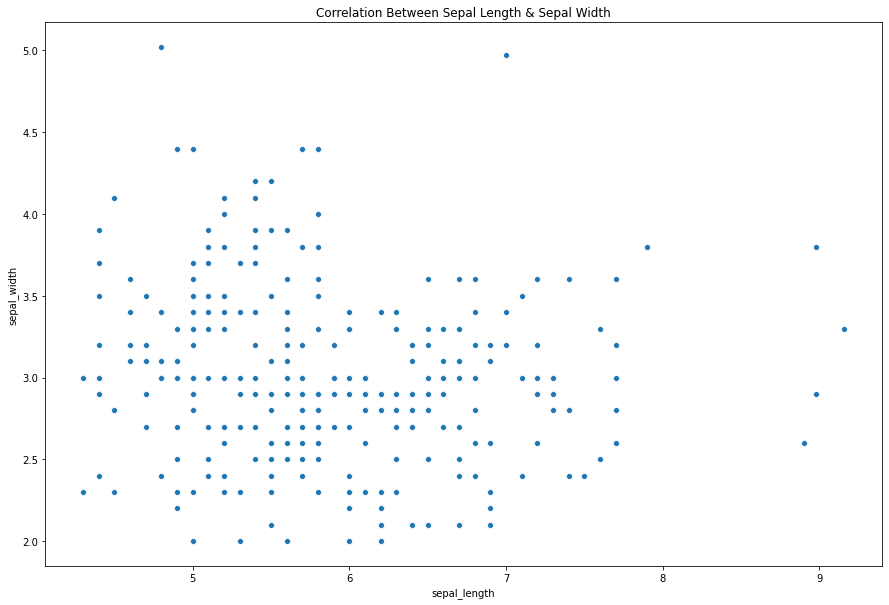

In [27]:
# -- Plot the distribution (Scatter plot) --
%matplotlib inline

plt.figure(figsize=(15,10))
sns.scatterplot(x=plants['sepal_length'],
                y=plants['sepal_width'])
plt.title('Correlation Between Sepal Length & Sepal Width')

### Standardize Data

In [28]:
# -- Using Sklearn --
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plants[['sepal_length','sepal_width']] = scaler.fit_transform(plants[['sepal_length','sepal_width']].to_numpy())


In [29]:
# -- Scaling --
import scipy.stats as stats

z_score = stats.zscore(plants[['sepal_length','sepal_width']])
z_score

array([[-1.13473508,  0.68574139],
       [-0.91245743, -0.06454274],
       [-1.13473508, -0.06454274],
       [-0.8013186 ,  1.43602552],
       [-0.91245743,  0.31059933],
       [-0.69017978,  1.81116758],
       [-0.46790212,  1.62359655],
       [-0.69017978,  0.87331242],
       [-0.91245743,  1.06088345],
       [-0.46790212, -0.25211377],
       [-0.91245743,  0.49817036],
       [-0.46790212,  1.99873861],
       [-0.46790212,  1.24845448],
       [-0.3567633 , -0.25211377],
       [-0.8013186 ,  1.43602552],
       [-0.91245743, -0.06454274],
       [-1.02359626, -1.37753996],
       [-0.57904095, -0.62725583],
       [-0.46790212,  0.68574139],
       [-0.24562447,  0.49817036],
       [-0.91245743,  0.68574139],
       [-0.91245743,  0.87331242],
       [-0.3567633 ,  2.18630964],
       [-0.02334682,  1.43602552],
       [-1.46815156, -1.37753996],
       [-0.57904095,  0.68574139],
       [-1.02359626,  0.12302829],
       [-0.02334682,  0.87331242],
       [-0.91245743,

In [30]:
# -- Save standardized data into a DataFrame --

X_z = pd.DataFrame(z_score,columns=['sepal_length_z','sepal_width_z'])

X_z.head()

,sepal_length_z,sepal_width_z
0,-1.134735,0.685741
1,-0.912457,-0.064543
2,-1.134735,-0.064543
3,-0.801319,1.436026
4,-0.912457,0.310599


## Use the model to predict five cases that are chosen from each original specie. 

### Modeling the data for 5 cases (K = 5)

In [31]:
# -- fit the model with data --
# -- Creating three clusters --

from sklearn.cluster import KMeans
k = 5
kmeans_df = KMeans(n_clusters = 5).fit(X_z)

In [32]:
# -- Obtain the labels --

label = kmeans_df.labels_

label

array([1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 0, 0, 1, 1, 1, 1,
       3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 3, 3, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 3, 0, 3, 1, 3, 1, 1, 3, 3, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 4, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0,
       1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0,
       0, 1, 4, 1, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 4, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 4, 1, 4, 0, 4, 0, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       4, 4, 3, 4, 2, 1, 2, 0, 0, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 3, 0, 2, 0, 2, 0, 4, 2, 0, 2, 4, 2, 4, 2, 1, 1, 2, 4, 2, 1, 2,
       0, 4, 0, 2, 4, 4, 2, 2, 0, 3, 2, 4, 3, 0, 2,

In [33]:
# -- obtain the centroids --
cluster_center = kmeans_df.cluster_centers_
cluster_center

array([[-0.13306079, -1.15149282],
       [-0.88107706,  0.25543137],
       [ 0.63587389, -0.01058395],
       [-0.53629525,  1.72435471],
       [ 1.99223373,  0.05425225]])

### Combining The Data

In [34]:
# -- Merge original data, rescaled data and cluster labels --

clt = pd.DataFrame(label, columns=['label'])

df_cluster = pd.concat([plants,X_z,clt],axis=1)

### Plotting Cluster - sepal_length and sepal_width

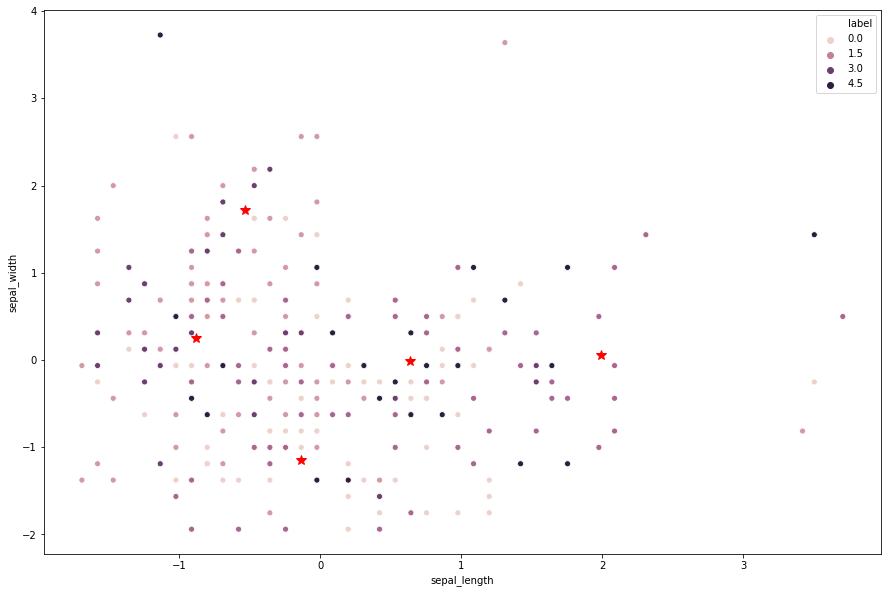

In [35]:
# -- plot clusters --
 
plt.figure(figsize = (15,10))
sns.scatterplot(df_cluster['sepal_length'],
               df_cluster['sepal_width'],
               hue = df_cluster['label']);

# -- plot centroids of the clusters --

plt.plot(cluster_center[:,0],
        cluster_center[:,1],
        'r*',
        markersize = 10);

## Classification

### Splitting into training and testing data

In [36]:
# -- split training and testing --
X = plants[['sepal_length','sepal_width']] # -- predictors --
y = plants['species']             # -- target --

# -- Split the data --
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 1)

### Neural Networks Analysis

In [37]:
# -- train neural nets --
ann_clf = MLPClassifier(hidden_layer_sizes = (2),
                        activation = 'logistic',
                        solver = 'lbfgs',
                        random_state = 1)

ann_clf.fit(X_train,y_train)

# -- no need to use ann_clf.fit(X_train,y_train.values)

/Users/nathanyoon/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

### Validate the model with testing data

### Confusion Matrix

#### Confusion Matrix of Training Data

#### Breaking down into training and testing confusion matrix. We want to see the correlation with each species in relationship to data.

Text(0.5, 1.0, 'Confusion Matrix - Training Data')

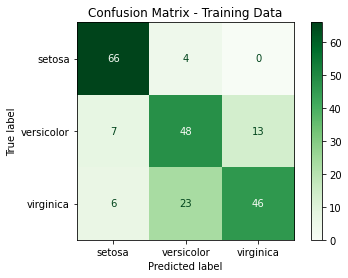

In [38]:
metrics.plot_confusion_matrix(ann_clf,
                             X_train,
                             y_train,
                             cmap = 'Greens')
plt.title('Confusion Matrix - Training Data')

In [39]:
metrics.confusion_matrix(y_train,
                        ann_clf.predict(X_train))

array([[66,  4,  0],
       [ 7, 48, 13],
       [ 6, 23, 46]])

#### Confusion Matrix of Testing Data

Text(0.5, 1.0, 'Confusion Matix - Test Data')

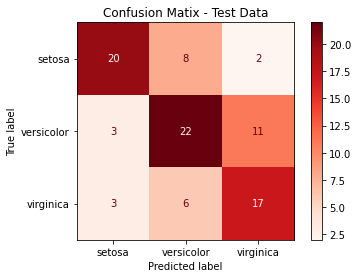

In [40]:
# -- Use sklearn.metrics to present confustion_matrix --

metrics.plot_confusion_matrix(ann_clf,
                             X_test,
                             y_test,
                             cmap = 'Reds')

plt.title('Confusion Matix - Test Data')

In [41]:
# -- Validation performance --
# -- Use test data --
metrics.confusion_matrix(y_true = y_test,
                         y_pred=ann_clf.predict(X_test))

array([[20,  8,  2],
       [ 3, 22, 11],
       [ 3,  6, 17]])

### Decision Tree Analysis

In [42]:
# -- Fit the CART model --

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion = 'gini',max_leaf_nodes = 5)

plants_CART = dt_clf.fit(X,y)

In [43]:
# -- accuracy --
dt_clf.score(X,y)

0.7114754098360656

In [44]:
# -- target --
y = plants['species']
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [45]:
# -- Obtain variables (feature) names and target names --
# -- Feature and target names are needed to create a decision tree --
X_names = X.columns
y_names = ['setosa','versicolor', 'virginica']
print(X_names)
print(y_names)

Index(['sepal_length', 'sepal_width'], dtype='object')
['setosa', 'versicolor', 'virginica']


In [46]:
# -- Using graphviz to visually show dot_data break down in a graph --

dot_data = export_graphviz(plants_CART,
                           out_file = None,
                           feature_names = X_names,
                           class_names = y_names,
                           filled = True)

graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [47]:
from sklearn.metrics import confusion_matrix

dt_pred = dt_clf.predict(X)

confusion_matrix(y, dt_pred)

array([[84, 16,  0],
       [ 7, 68, 29],
       [ 9, 27, 65]])

### Prediction: Use the following data to predict their species

In [48]:
log_regress = LogisticRegression(solver = 'liblinear') # Instantiate an object of the class

# --- Obtain and print out intercept and coefficients ---
log_regress.fit( X = X, y = y)

print(log_regress.intercept_)
print(log_regress.coef_)

[-1.91385236 -0.82703562 -0.85604274]
[[-2.86831648  1.47618459]
 [ 0.09892409 -1.09820882]
 [ 1.31936486  0.01615539]]


In [49]:
test_prob = log_regress.predict_proba(X = X) # Use the test data, x1, to validate the model for further analysis
preds = log_regress.predict(X = X)
preds_prob = pd.DataFrame(test_prob)  # Convert the result into a dataframe

preds_prob.columns = ['setosa','versicolor', 'virginica'] # This is dispaying prob for each column stated
preds_prob

,setosa,versicolor,virginica
0,0.789717,0.134444,0.075839
1,0.610485,0.283022,0.106493
2,0.670093,0.255065,0.074842
3,0.816134,0.068007,0.115859
4,0.694652,0.201781,0.103567
...,...,...,...
300,0.151667,0.247874,0.600459
301,0.001648,0.459398,0.538954
302,0.007657,0.665675,0.326669
303,0.033331,0.354927,0.611742


In [50]:
Prediction =  pd.DataFrame({ 'sepal_length': [6.4, 5, 6.3, 7, 5.8, 5.3], 
                  'sepal_width': [3.2, 3.3, 3.3, 3.2, 2.7, 3.7],
                    'petal_length': [4.5, 1.4, 6, 4.7, 5.1, 1.5],
                           'petal_width': [1.5,0.2, 2.5, 1.4, 1.9, 0.2],} )
Prediction

,sepal_length,sepal_width,petal_length,petal_width
0,6.4,3.2,4.5,1.5
1,5.0,3.3,1.4,0.2
2,6.3,3.3,6.0,2.5
3,7.0,3.2,4.7,1.4
4,5.8,2.7,5.1,1.9
5,5.3,3.7,1.5,0.2


In [51]:
prediction = [[6.4, 3.2],
              [5, 3.3],
              [6.3, 3.3],
              [7, 3.2],
              [5.8, 2.7],
              [5.3, 3.7]]
prediction = pd.DataFrame(prediction,columns=['sepal_length','sepal_width'])
prediction

,sepal_length,sepal_width
0,6.4,3.2
1,5.0,3.3
2,6.3,3.3
3,7.0,3.2
4,5.8,2.7
5,5.3,3.7


In [52]:
dt_clf.predict(prediction)

array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica'], dtype=object)

### Which one, Decision Tree or Neural Network, produces better results? Why?

### I don't think there is necessarily one that is "better" than the other. Each analysis displays a different story between variables in a dataset to better understand whether there is a linear or nonlinear relationship. Both can take a situation/scenario with data and manipulate it in a way to make better business decisions for complex problems. It depends on what the analyst wants and I believe both can help in many ways. It really depends on what message you're to to intepret and get across.